### Data Set a Data Frame

Se obtiene el Data Frame y se pasan las variables categóricas a numéricas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path_file = "dataAnimales.csv"
dataframe = pd.read_csv(path_file) 

dict_species = {
    "Mountain Lion":     0,
    "Black Bear":        1,
    "Brown Bear":        2,
    "Polar Bear":        3,
    "Muskox":            4,  # Buey
    "Gray Wolf":         5,
    "Thinhorn Sheep":    6,
    "Mountain Goat":     7,
    "Bighorn Sheep":     8,
    "Caribou":           9,  # Reno
    "Pronghorn":         10, # Berrendo
    "White-tailed Deer": 11,
    "Moose":             12, # Alce
    "Mule Deer":         13,
    "Elk":               14  # Ciervo Canadiense
}

dict_province_state = {
  'Alabama': 0, 'Alaska': 1, 'Alberta': 2, 'Arizona': 3, 'British Columbia': 4, 
  'California': 5, 'Colorado': 6, 'Florida': 7, 'Georgia': 8, 'Idaho': 9, 
  'Illinois': 10, 'Indiana': 11, 'Iowa': 12, 'Kansas': 13, 'Kentucky': 14, 
  'Maine': 15, 'Manitoba': 16, 'Minnesota': 17, 'Mississippi': 18, 'Missouri': 19, 
  'Montana': 20, 'Nebraska': 21, 'Nevada': 22, 'New Brunswick': 23, 'New Hampshire': 24, 
  'New Mexico': 25, 'New York': 26, 'Newfoundland': 27, 'North Carolina': 28, 'North Dakota': 29, 
  'Northwest Territories': 30, 'Nunavut': 31, 'Oklahoma': 32, 'Ontario': 33, 'Oregon': 34, 
  'Pennsylvania': 35, 'Quebec': 36, 'Saskatchewan': 37, 'South Dakota': 38, 'Texas': 39, 
  'Utah': 40, 'Vermont': 41, 'Virginia': 42, 'Washington': 43, 'Wyoming': 44, 'Yukon': 45
}

dict_srank = {
  'S1': 0, 'S2': 1, 'S2S3': 2, 'S3': 3, 'S3S4': 4, 'S4': 5, 'S5': 6, 'S5 ': 7
}

dict_classification = {
  'Carnivore': 0, 'Ungulate': 1
}

dict_sci = {
  'N': 0, 'Y': 1
}

pd.set_option('future.no_silent_downcasting', True) # Algo relacionado con Downcasting, ni idea pero esto elimina las advertencias/problemas.


dataframe["Species"] = dataframe["Species"].replace(
    dict_species.keys(),
    dict_species.values()
)

dataframe["Province/State"] = dataframe["Province/State"].replace(
    dict_province_state.keys(),
    dict_province_state.values()
)

dataframe["S Rank"] = dataframe["S Rank"].replace(
    dict_srank.keys(),
    dict_srank.values()
)

dataframe["Classification"] = dataframe["Classification"].replace(
    dict_classification.keys(),
    dict_classification.values()
)

dataframe["SCI"] = dataframe["SCI"].replace(
    dict_sci.keys(),
    dict_sci.values()
)


dataframe

,Species,Province/State,Price,Number of days,Day price,S Rank,Status,Classification,Avg Mass,SCI,Latitude
0,0,2,15930,10.0,1593,5,4.0,0,60.4,1,54.5000
1,0,2,9500,10.0,950,5,4.0,0,60.4,1,54.5000
2,0,2,10000,10.0,1000,5,4.0,0,60.4,1,54.5000
3,0,2,12500,10.0,1250,5,4.0,0,60.4,1,54.5000
4,0,3,5000,5.0,1000,5,4.0,0,60.4,1,34.1661
...,...,...,...,...,...,...,...,...,...,...,...
716,14,44,6600,7.0,943,6,5.0,1,327.5,0,43.0000
717,14,44,6200,5.0,1240,6,5.0,1,327.5,0,43.0000
718,14,44,5450,6.0,908,6,5.0,1,327.5,0,43.0000
719,14,44,8000,7.0,1143,6,5.0,1,327.5,0,43.0000


### Selección de la Base de Datos

El objetivo de esta red es, a partir de datos sobre caza guiada, estimar coste que tendrá tal actividad.

Es decir, por ejemplo, brindar: 
* Peso
* Rareza
* Zona geográfica
* Duración de la caza
* Etc.

y recibir un precio de coste estimado.

Si bien nuestra red neuronal se va a centrar en predecir un único resultado específico, a lo largo del análisis claramente podremos identificar correlaciones entre distintas variables y extraer todo tipo de conclusiones. Por ejemplo, podríamos observar cómo influye la rareza de una especie en la conservación de la misma, o cómo se relaciona la duración de una cacería guiada con su costo.

Entonces, tras el análisis de datos podremos tener una visión más amplia del impacto de estos factores en la caza guiada a su vez que el efecto de esta actividad sobre diversas especies de animales, todo esto mientras nuestra red está enfocada en generar una única predicción.


### 1. Análisis General

Columnas del conjunto de datos:
* Price : Costo de la caza guiada.
* S Rank: Rareza (0-7) de la especie.
* Avg Mass : Masa Promedio del animal.

In [17]:
dataframe.describe()

,Price,Number of days,Day price,Status,Avg Mass,Latitude
count,721.000000,721.000000,721.000000,674.000000,721.000000,721.000000
mean,7896.639390,6.370943,1108.588072,4.397626,175.335673,46.451334
std,8265.377351,2.499674,695.661660,0.828931,130.378563,9.972077
min,800.000000,2.000000,200.000000,1.000000,45.000000,28.058566
25%,3500.000000,5.000000,700.000000,4.000000,81.500000,38.996250
50%,5250.000000,6.000000,938.000000,5.000000,102.500000,45.217200
75%,8500.000000,7.000000,1280.000000,5.000000,327.500000,54.149015
max,60000.000000,16.000000,8571.000000,5.000000,416.250000,69.376475


In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Species         721 non-null    object  
 1   Province/State  721 non-null    object  
 2   Price           721 non-null    int64   
 3   Number of days  721 non-null    float64 
 4   Day price       721 non-null    int64   
 5   S Rank          674 non-null    category
 6   Status          674 non-null    float64 
 7   Classification  721 non-null    object  
 8   Avg Mass        721 non-null    float64 
 9   SCI             721 non-null    object  
 10  Latitude        721 non-null    float64 
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 57.5+ KB



### 2. Análisis de Correlaciones

Tenemos bastantes datos para analizar, pero podemos comenzar por el que marca la tendencia principal: La **Rareza**

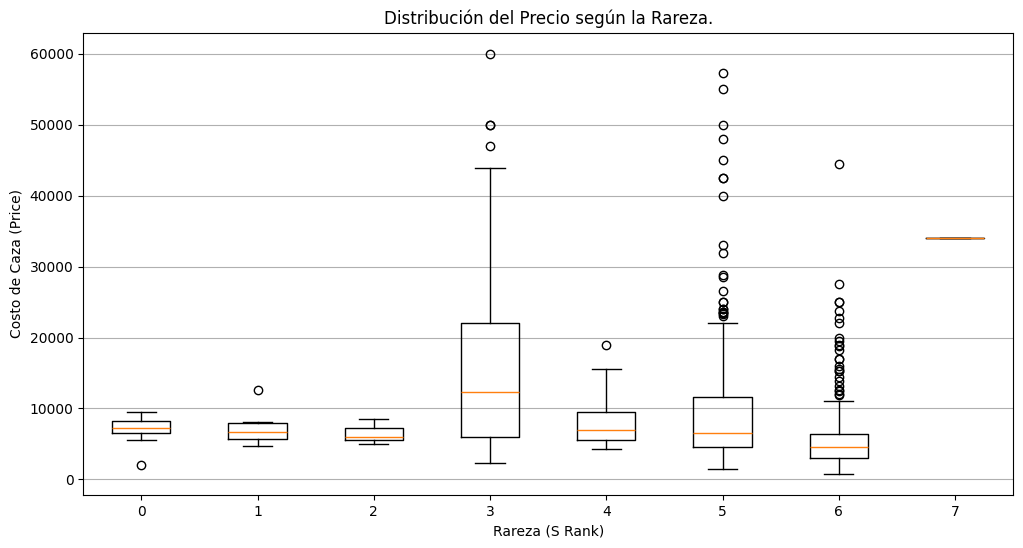

In [2]:
# S Rank Implica la rareza de la especie. 
# S1 -> 0, S5 -> 7.
# S7 implica mucha más rareza que S1.

dataframe['S Rank'] = dataframe['S Rank'].astype('category')

# Esto es para crear un gráfico de cajas (BoxPlot)
plt.figure(figsize=(12, 6))

# Generamos un BoxPlot para cada S Rank.
box_data = [dataframe[dataframe['S Rank'] == s]['Price'] for s in dataframe['S Rank'].cat.categories]

# Hacemos el Gráfico.
plt.boxplot(box_data, tick_labels=dataframe['S Rank'].cat.categories)

plt.title('Distribución del Precio según la Rareza.')
plt.xlabel('Rareza (S Rank)')
plt.ylabel('Precio de Caza Guiada (Price)')

plt.grid(axis='y')
plt.show()

En el gráfico Boxplot anterior podemos ver los valores del Data Frame, más específicamente las columnas de Precios de las guías y las Rarezas. Aunque no tengamos en cuenta otros factores, nos va a servir para sacar rápidamente las siguientes conclusiones.

En los Boxplot que se pueden obervar, los valores por fuera de las cajas son considerados atípicos, y la línea naranja sería la media.

Podemos observar que claramente la tendencia general marca que, a medida que aumenta la rareza del animal, también lo hace el precio de la caza guiada. Por ejemplo, el rango de precios considerado no atípico para la rareza 3 es mucho más amplia que los rangos de las demás rarezas, lo que podría indicar que en esa rareza ofrece una mayor variedad y oferta en precios que las demás.

Además, podemos evidenciar más valores atípicos conforme subimos de rareza, siendo los máximos aquellos que se encuentran en la rareza 3 y 5. Y si bien la rareza 7 (que uno podría pensar que tendría el valor atípico más alto de todas las rarezas) no sigue la misma tendencia, se puede destacar que su media de precio es más del doble que el resto.

Nuevamente como mencionamos al comienzo, es importante resaltar que no estamos teniendo otros factores en cuenta, pero con este simple pantallazo podemos sacar algunas conclusiones importantes, se puede evidenciar muy claramente la relación entre la rareza de un animal y su precio de caza guiada.

Otro factor clave que se puede intuir modifica el precio de la caza guiada podría ser el **promedio de la masa del animal** en cuestión.

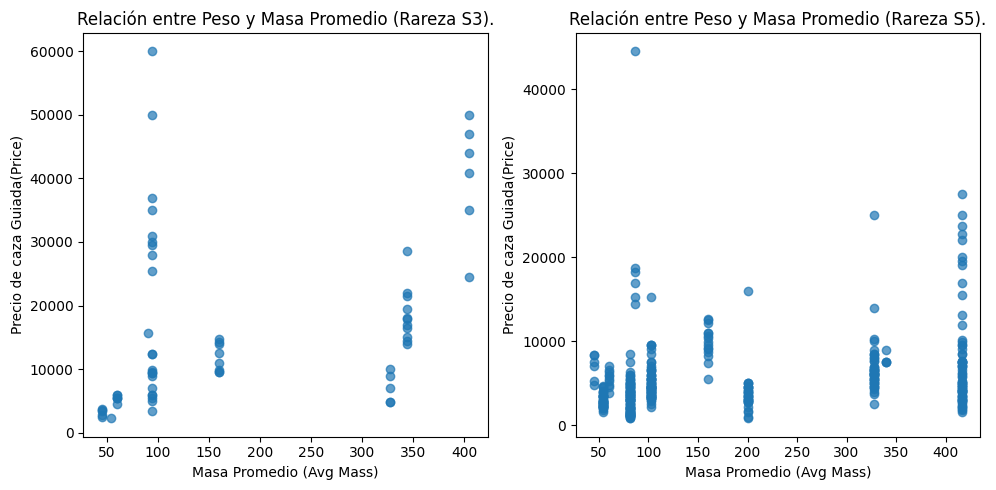

In [61]:
# Para tener en cuenta.
#   dict_srank = {
#       'S1': 0, 'S2': 1, 'S2S3': 2, 'S3': 3, 'S3S4': 4, 'S4': 5, 'S5': 6, 'S5 ': 7
#   }

rareza_3 = dataframe[dataframe["S Rank"]==3] # 3 -> S3
rareza_6 = dataframe[dataframe["S Rank"]==6] # 6 -> S5

fig, graf = plt.subplots(1, 2, figsize=(10, 5))

graf[0].scatter(rareza_3["Avg Mass"], rareza_3["Price"], alpha=0.7)
graf[0].set_title("Relación entre Peso y Masa Promedio (Rareza S3).")
graf[0].set_xlabel("Masa Promedio (Avg Mass)")
graf[0].set_ylabel("Precio de caza Guiada(Price)")

graf[1].scatter(rareza_6["Avg Mass"], rareza_6["Price"], alpha=0.7)
graf[1].set_title("Relación entre Peso y Masa Promedio (Rareza S5).")
graf[1].set_xlabel("Masa Promedio (Avg Mass)")
graf[1].set_ylabel("Precio de caza Guiada(Price)")

plt.tight_layout()
plt.show()

Con respecto a la relación entre el peso del animal y el costo que tendrá la caza guiada, también encontramos una correlación.
Como podemos apreciar en la rareza S3 y la S5 hay una tendencia (aunque en la S3 tengamos valores atípicos que hacen ruido).
Entonces, no sólo la rareza influye en el costo, sino que también lo hace en parte la masa promedio del animal en cuestión. Por otro lado, hay que resaltar que seleccionamos las muestras en cuestión porque hay otras rarezas donde la variación del peso es prácticamente nula (por ejemplo S1).

La razón por la cual podemos llegar a tener esos valores atípicos en S3 probablemente viene dada por la **especie** del animal. Si revisamos los datos centrándonos en S3 con precio descendente podemos observar lo siguiente:

In [69]:
#Printeamos un head con los valores de precio ordenados descendientemente, en la rareza S3.
s3_precios = dataframe[dataframe["S Rank"]==3].sort_values(by="Price", ascending=False)
s3_precios.head(10)

,Species,Province/State,Price,Number of days,Day price,S Rank,Status,Classification,Avg Mass,SCI,Latitude
238,8,4,60000,7.0,8571,3,3.0,1,94.67,1,54.149015
240,8,4,50000,10.0,5000,3,3.0,1,94.67,1,54.149015
135,3,31,49950,10.0,4995,3,3.0,0,405.00,1,67.353408
134,3,31,46950,10.0,4695,3,3.0,0,405.00,1,67.353408
132,3,31,43950,10.0,4395,3,3.0,0,405.00,1,69.376475
133,3,31,40850,10.0,4085,3,3.0,0,405.00,1,69.376475
237,8,4,36958,10.0,3696,3,3.0,1,94.67,1,54.149015
236,8,4,35000,10.0,3500,3,3.0,1,94.67,1,54.149015
136,3,30,35000,14.0,2500,3,3.0,0,405.00,1,67.353408
235,8,4,31000,12.0,2583,3,3.0,1,94.67,1,54.149015


Efectivamente vemos que se repiten ciertas especies, en cuestión la 8 y la 3.  Se trata de la BigHorn Sheep y el Polar Bear respectivamente.


Por lo tanto, dentro de una misma rareza, no solo influye el peso, sino también la especie. En este caso podemos ver que la masa del Polar Bear claramente es considerable, y aún así la Bighorn Sheep teniendo 1/4 de su masa lo supera en costo.